# HR Analytics Project- Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score , accuracy_score , recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

# loading dataset into dataframe

In [4]:
adf = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
adf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
adf.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [7]:
adf.shape

(1470, 35)

In [8]:
#meta data-Statistical information
adf.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
#getting all the column names
adf.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
#meta data-information abt the datatypes of columns
adf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
#checking for any null vales
adf.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='Age', ylabel='count'>

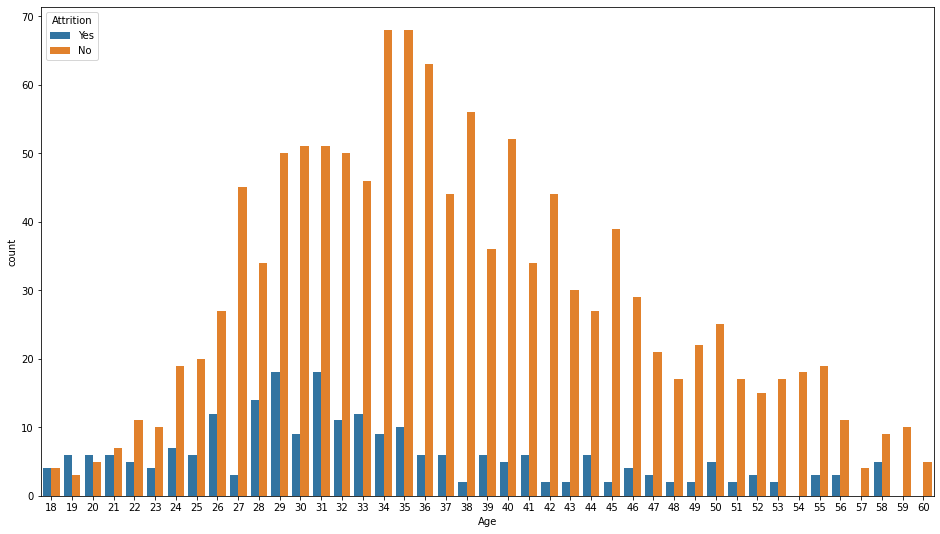

In [12]:
plt.figure(figsize = (16,9))
sns.countplot('Age', hue='Attrition', data=adf)

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

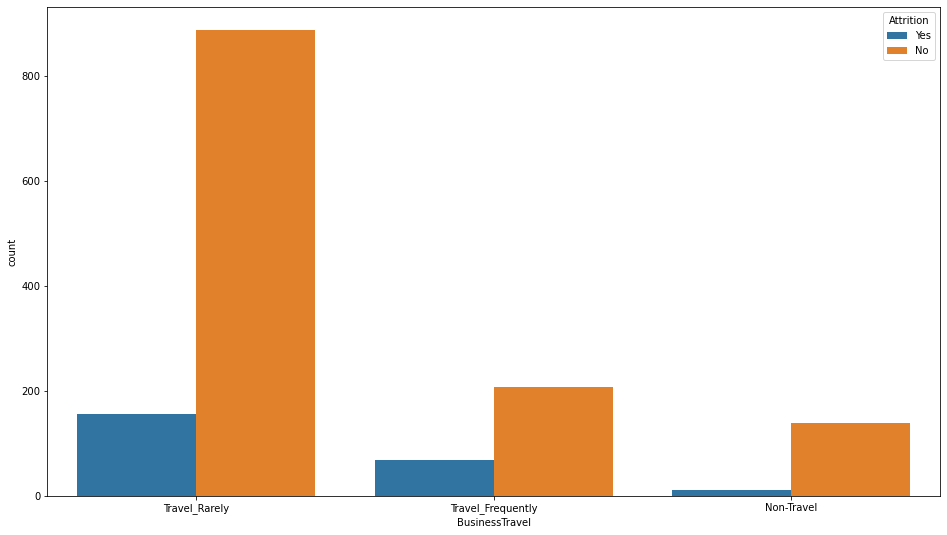

In [13]:
plt.figure(figsize = (16,9))
sns.countplot('BusinessTravel', hue='Attrition', data=adf)

<AxesSubplot:xlabel='Department', ylabel='count'>

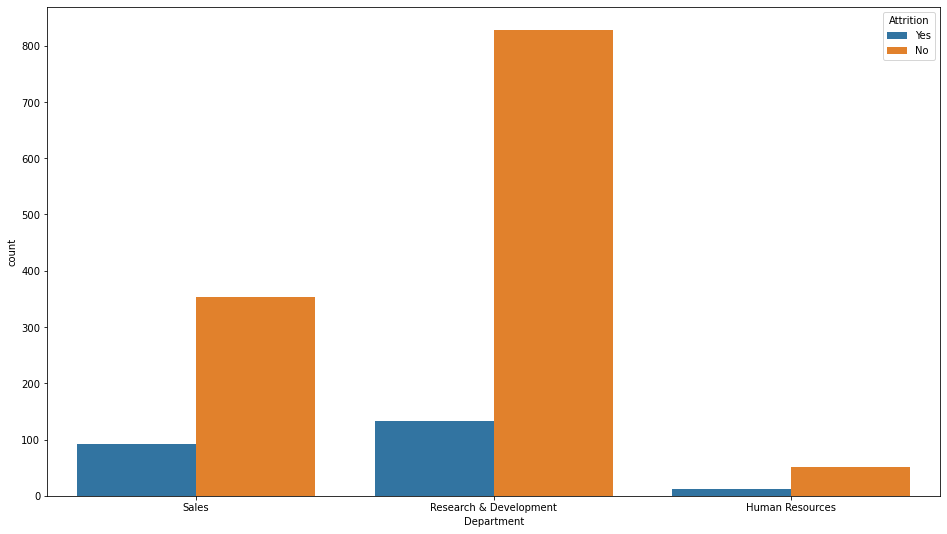

In [14]:
plt.figure(figsize = (16,9))
sns.countplot('Department', hue='Attrition', data=adf)

<AxesSubplot:xlabel='EducationField', ylabel='count'>

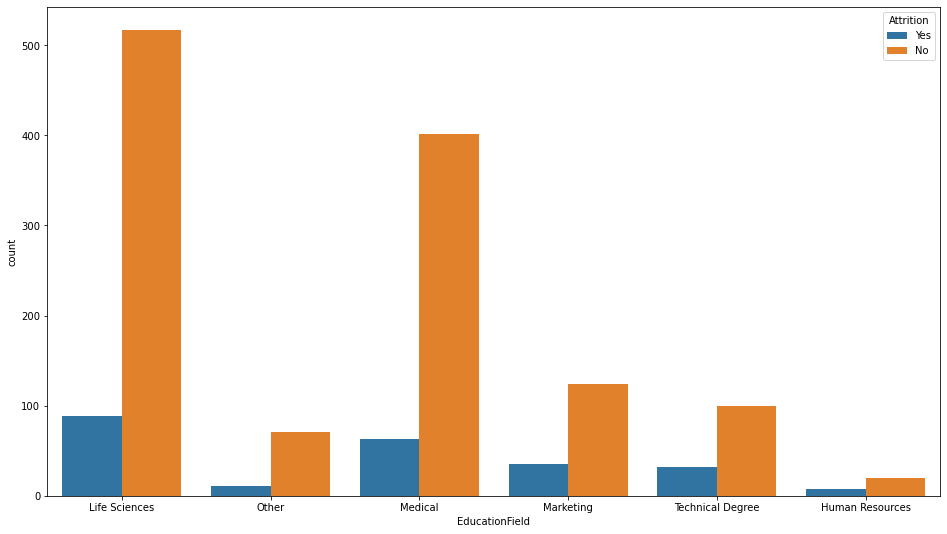

In [15]:
plt.figure(figsize = (16,9))
sns.countplot('EducationField', hue='Attrition', data=adf)

<AxesSubplot:xlabel='Gender', ylabel='count'>

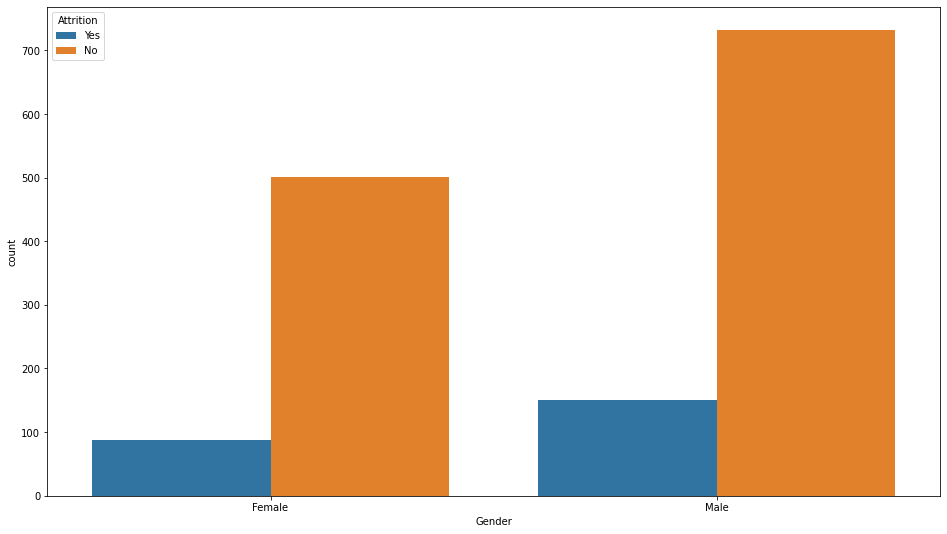

In [16]:
plt.figure(figsize = (16,9))
sns.countplot('Gender', hue='Attrition', data=adf)

<AxesSubplot:xlabel='JobRole', ylabel='count'>

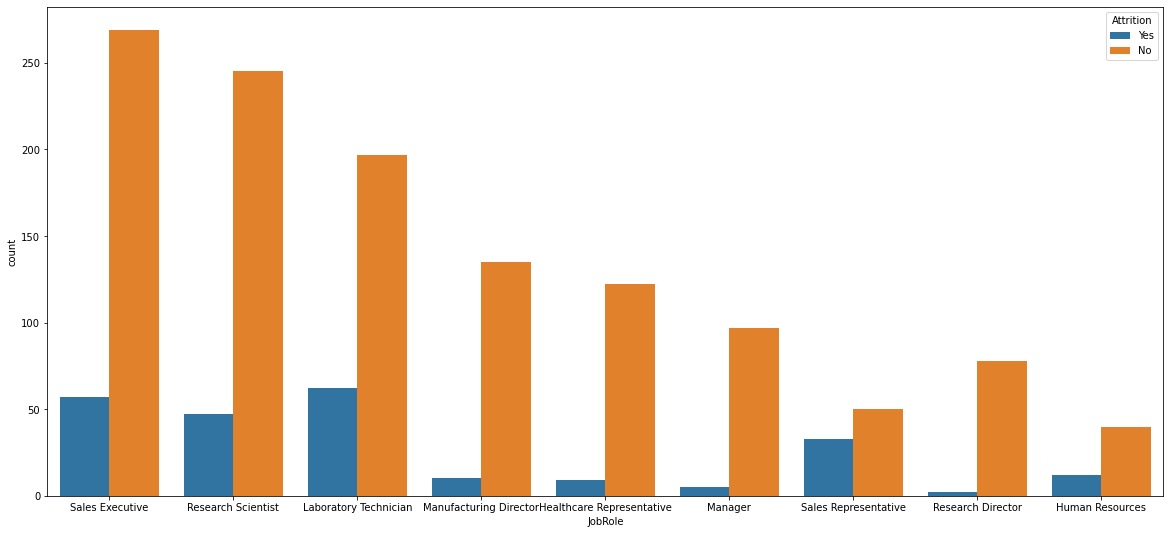

In [17]:
plt.figure(figsize = (20,9))
sns.countplot('JobRole', hue='Attrition', data=adf)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

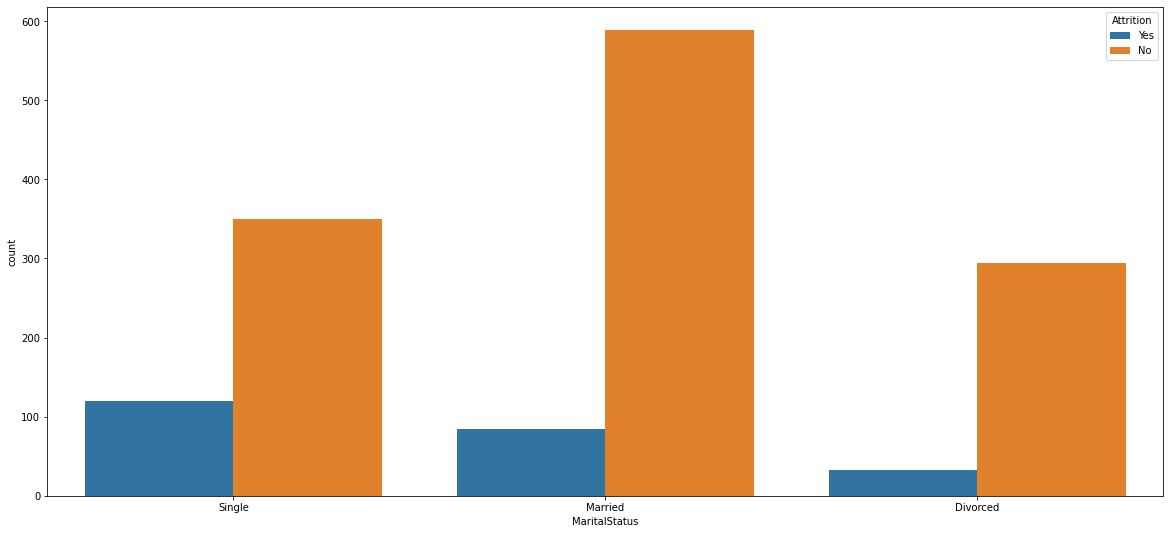

In [18]:
plt.figure(figsize = (20,9))
sns.countplot('MaritalStatus', hue='Attrition', data=adf)

<AxesSubplot:xlabel='OverTime', ylabel='count'>

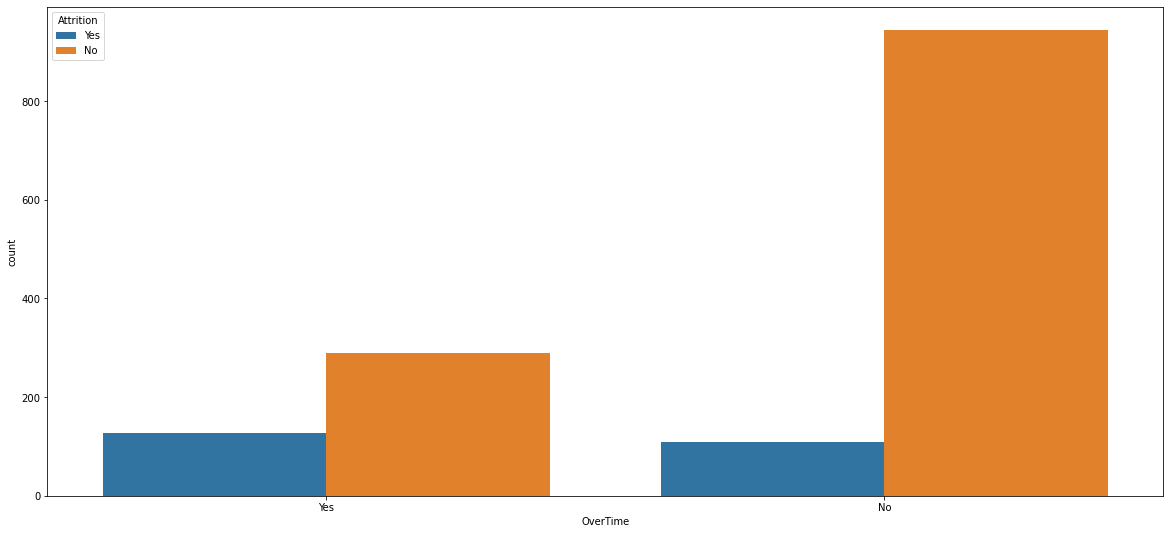

In [19]:
plt.figure(figsize = (20,9))
sns.countplot('OverTime', hue='Attrition', data=adf)

# Data Preprocessing


In [20]:
object_type = [feature for feature in adf.columns if adf[feature].dtypes =='O']
print(object_type)
print("Number of columns with object data type in adf is :" , len(object_type))

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Number of columns with object data type in adf is : 9


In [21]:
integer_type = [feature for feature in adf.columns if adf[feature].dtypes !='O']
print(integer_type)
print("Number of columns with int64 data type is : " , len(integer_type))

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Number of columns with int64 data type is :  26


In [22]:
object_col = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
for col in object_col:
    print(col,'\n',adf[col].value_counts() )

Attrition 
 No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel 
 Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department 
 Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField 
 Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender 
 Male      882
Female    588
Name: Gender, dtype: int64
JobRole 
 Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
MaritalStatus 
 Married     673
Single      470
Divorced    327
Name: Marit

In [23]:
adf.Attrition.replace({'Yes': 1, 'No': 0}, inplace=True)

In [24]:
adf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [25]:
adf.BusinessTravel.replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently':2}, inplace=True)

In [26]:
adf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [27]:
adf.Department.replace({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2, }, inplace=True)

In [28]:
adf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,0,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [29]:
adf.EducationField.replace({'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 
                             'Technical Degree': 3, 'Human Resources': 4, 'Other':5},inplace = True)

In [30]:
adf['EducationField'].head(8)

0    0
1    0
2    5
3    0
4    1
5    0
6    1
7    0
Name: EducationField, dtype: int64

In [31]:
adf.Gender.replace({'Male': 1, 'Female': 1}, inplace=True)

In [32]:
adf['Gender'].head(8)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
Name: Gender, dtype: int64

In [33]:
adf.JobRole.replace({'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2,
                     'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5,
                     'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8}, inplace=True)

In [34]:
adf['JobRole']

0       0
1       1
2       2
3       1
4       2
       ..
1465    2
1466    4
1467    3
1468    0
1469    2
Name: JobRole, Length: 1470, dtype: int64

In [35]:
adf.MaritalStatus.replace({'Single': 0, 'Married': 1, 'Divorced': 2}, inplace=True)

In [36]:
adf['MaritalStatus']

0       0
1       1
2       0
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: MaritalStatus, Length: 1470, dtype: int64

In [37]:
adf.shape

(1470, 35)

In [38]:
adf['Over18'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1465    Y
1466    Y
1467    Y
1468    Y
1469    Y
Name: Over18, Length: 1470, dtype: object>

In [39]:
adf.drop('Over18' , axis = 1 , inplace = True)

In [40]:
adf.OverTime.replace({'Yes': 1, 'No': 0}, inplace=True)

In [41]:
adf['OverTime']

0       1
1       0
2       1
3       1
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: OverTime, Length: 1470, dtype: int64

In [42]:
object_type = [feature for feature in adf.columns if adf[feature].dtypes =='O']
print(object_type)
print("Number of columns with object data type in adf is :" , len(object_type))

[]
Number of columns with object data type in adf is : 0


In [43]:
adf

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,0,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,5,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,1,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,1,23,2,1,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,1,613,1,6,1,1,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,1,155,1,4,3,0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,2,1023,0,2,3,1,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Visualising Outliers

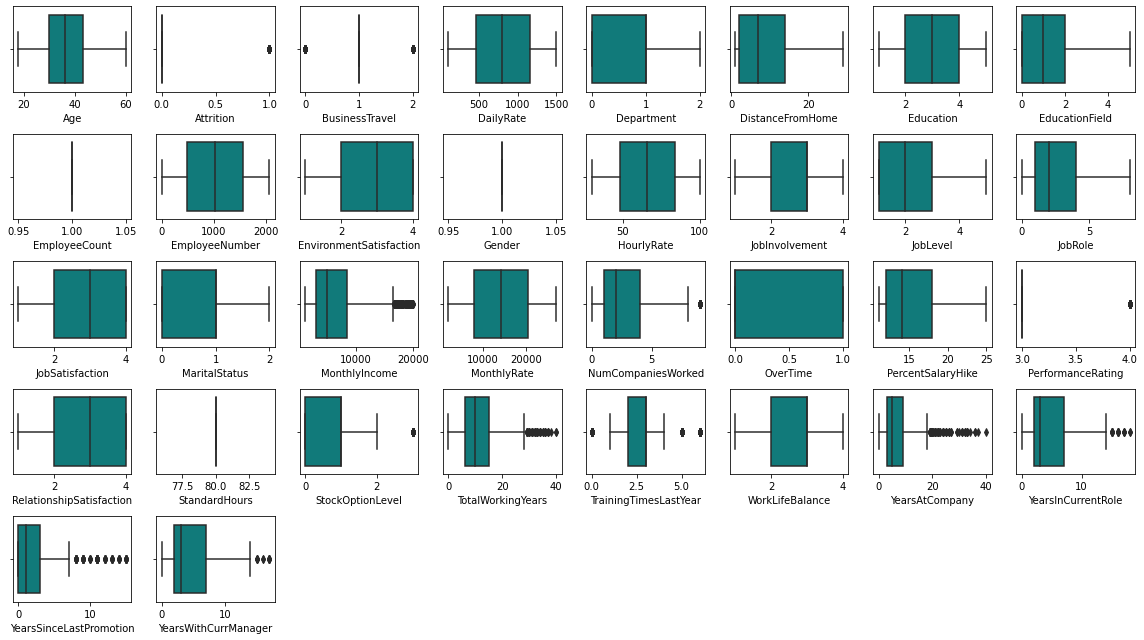

In [44]:
collist=adf.columns.values
ncol=8
nrows=5
plt.figure(figsize=(16, 9 ))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(adf[collist[i]],color='darkcyan',orient='h')
    plt.tight_layout()

# Removing Outliers

In [45]:
z_score = np.abs(zscore(adf))

In [46]:
print(np.where(z_score>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([33, 32, 30, 32, 31, 32, 27, 27, 30, 32, 31, 32, 33, 27, 30, 32, 33,
       32, 27, 33, 30, 31, 32, 31, 33, 30, 32, 27, 30, 31, 32, 32, 33, 27,
       30, 30, 32, 32, 27, 31, 30, 30, 32, 30, 33, 32, 30, 27, 30, 32, 33,
       27, 33, 30, 32, 

In [47]:
adf_wo = adf.drop([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430])

In [48]:
adf_wo

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,0,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,5,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,1,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,1,23,2,1,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,1,613,1,6,1,1,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,1,155,1,4,3,0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,2,1023,0,2,3,1,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Correlation

<AxesSubplot:>

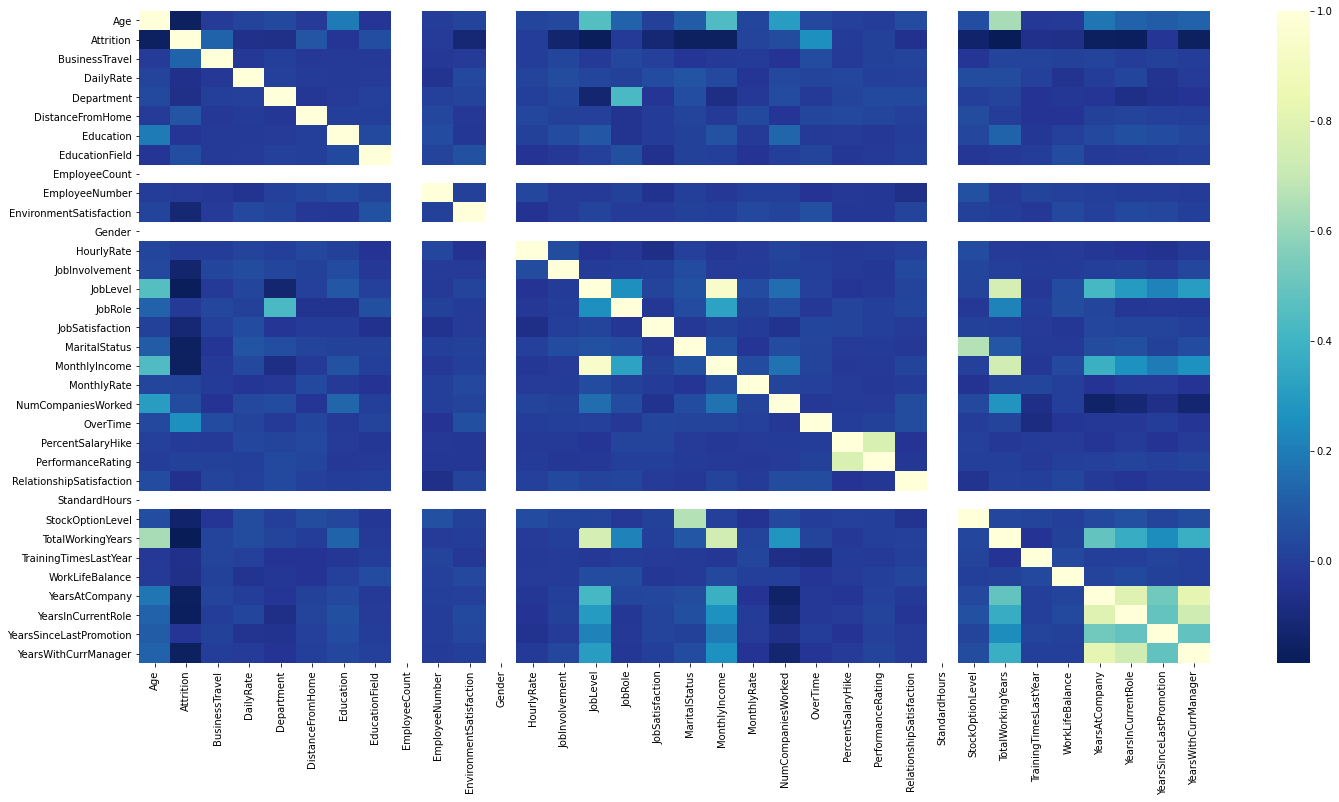

In [49]:
plt.figure(figsize = (24,12))
sns.heatmap(adf_wo.corr()  , cmap = 'YlGnBu_r')

In [50]:
corr_df = adf_wo.corr()
corr_df  = corr_df.iloc[: , 1:2]
corr_df

,Attrition
Age,-0.159366
Attrition,1.000000
BusinessTravel,0.127943
DailyRate,-0.057220
Department,-0.063637
DistanceFromHome,0.081788
Education,-0.032703
EducationField,0.051714
EmployeeCount,NaN
EmployeeNumber,-0.010169


# Skewness

In [51]:
x_predictor = adf_wo.drop('Attrition', axis = 1)
x_predictor

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,0,1,2,0,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,2,279,1,8,1,0,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,1,2,2,5,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,2,1392,1,3,4,0,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,1,591,1,2,1,1,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2,884,1,23,2,1,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,1,613,1,6,1,1,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,1,155,1,4,3,0,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,2,1023,0,2,3,1,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [52]:
x_predictor.skew()

Age                         0.472280
BusinessTravel              0.077788
DailyRate                  -0.017078
Department                 -0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              1.349606
EmployeeCount               0.000000
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                      0.000000
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                     0.869228
JobSatisfaction            -0.345612
MaritalStatus               0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StandardHours               0.000000
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
T

# DistPlot

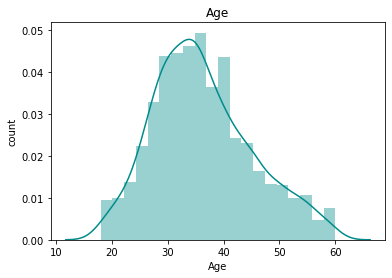

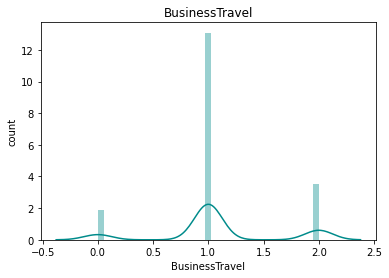

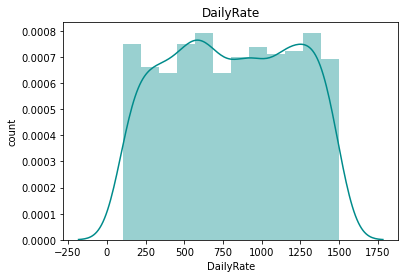

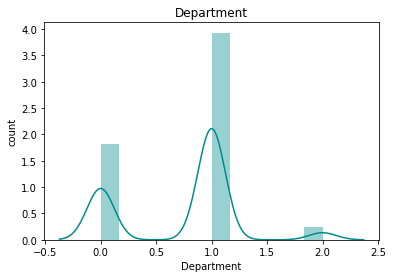

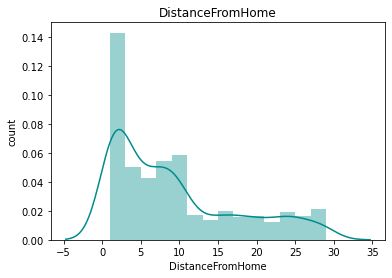

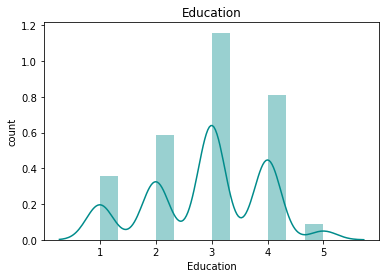

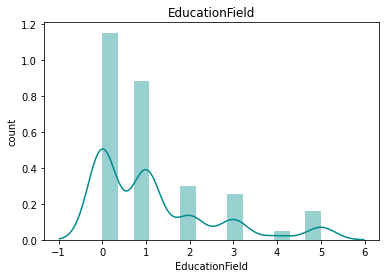

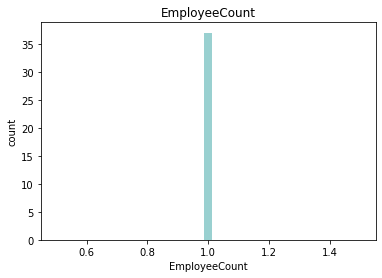

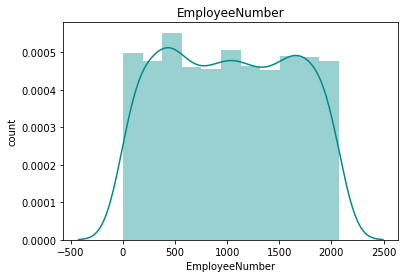

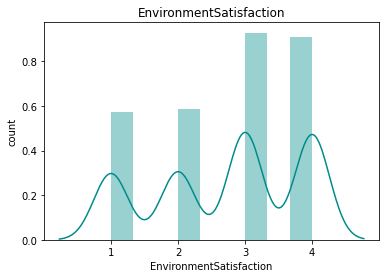

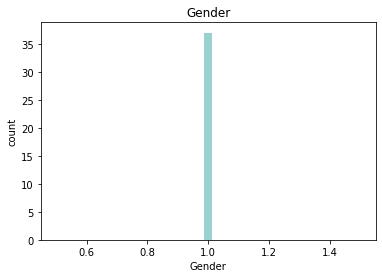

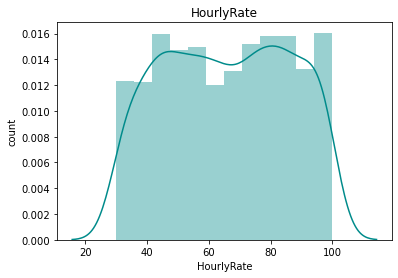

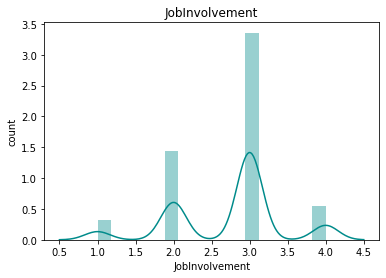

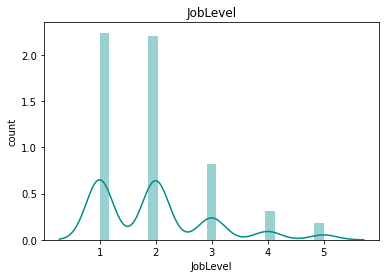

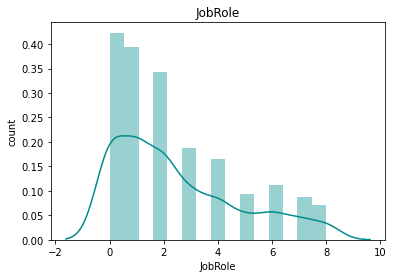

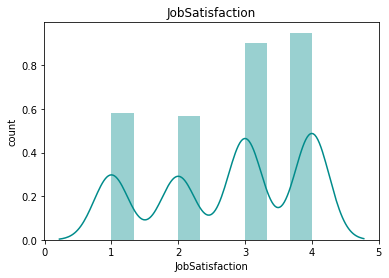

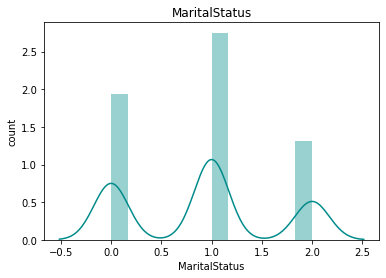

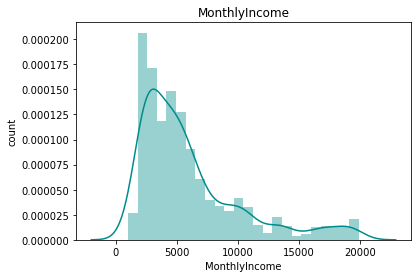

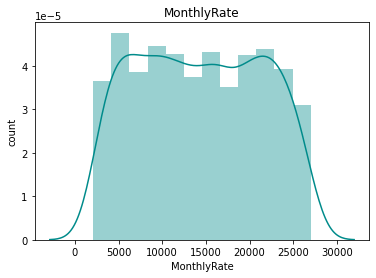

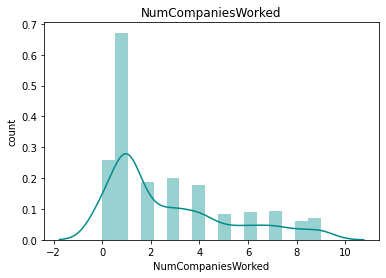

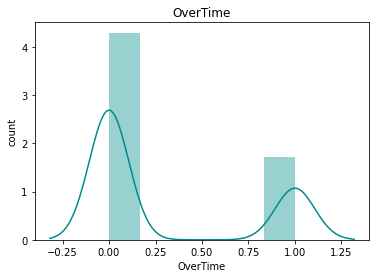

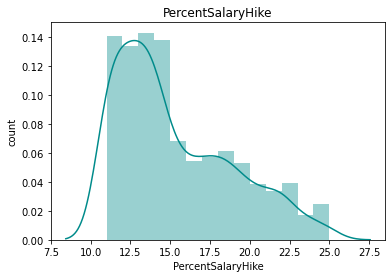

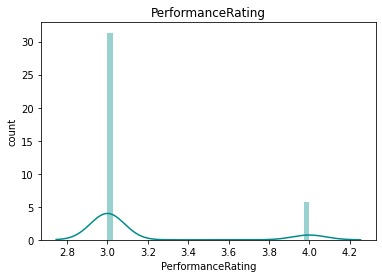

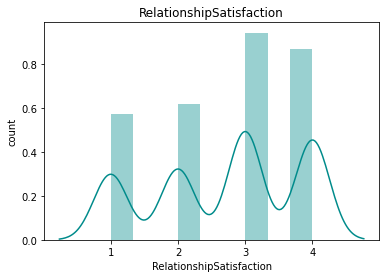

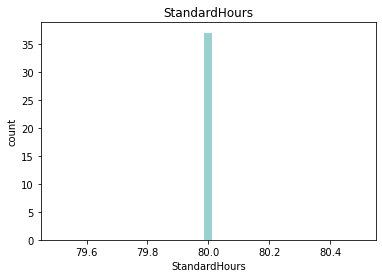

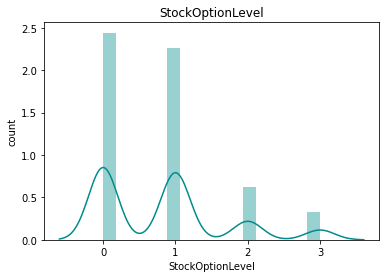

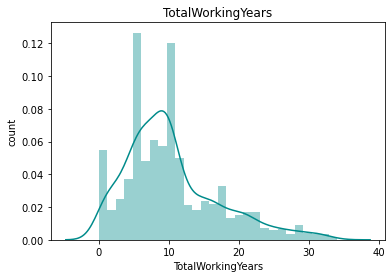

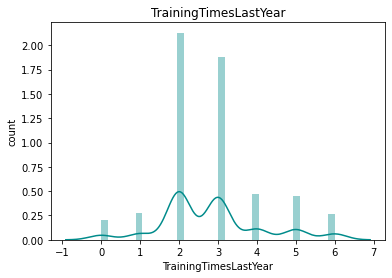

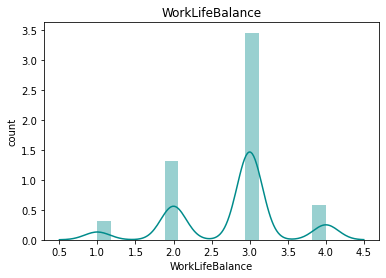

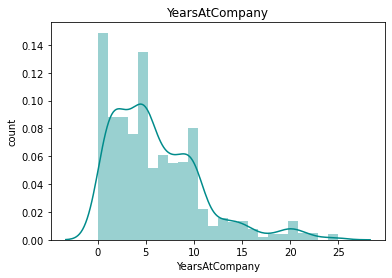

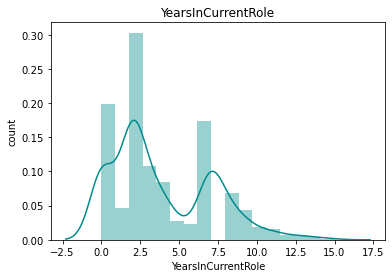

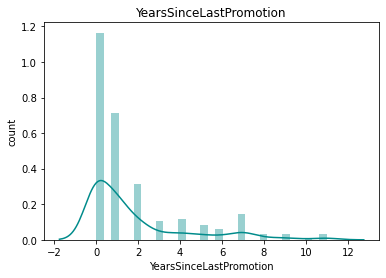

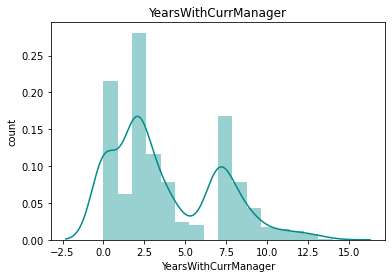

In [53]:
for feature in x_predictor :
    sns.distplot(x_predictor[feature] , kde = True , color = 'darkcyan' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

In [54]:
powert = PowerTransformer( method = 'yeo-johnson' , standardize = False)
x_t = powert.fit_transform(x_predictor)

In [55]:
x_t

array([[  5.13056252,   0.98461551, 263.35679217, ...,   2.01848545,
         -0.        ,   2.26028096],
       [  5.45382263,   1.94870775,  92.50531608, ...,   2.79457356,
          0.56664762,   2.72709012],
       [  4.94907117,   0.98461551, 311.20731843, ...,   0.        ,
         -0.        ,   0.        ],
       ...,
       [  4.41307089,   0.98461551,  58.95776401, ...,   1.28006925,
         -0.        ,   1.65682223],
       [  5.45382263,   1.94870775, 248.88821901, ...,   2.56391882,
         -0.        ,   2.92811069],
       [  4.80211929,   0.98461551, 171.74242105, ...,   1.68329287,
          0.56664762,   1.26427691]])

In [56]:
x_trans = pd.DataFrame(x_t , columns = x_predictor.columns)
x_trans

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,5.130563,0.984616,263.356792,0.000000,0.698793,2.498626,-0.000000,3.569396,0.889210,2.547710,...,1.128246,4620.323935,-0.000000,3.331995,0.000000,1.419993,2.427596,2.018485,-0.000000,2.260281
1,5.453823,1.948708,92.505316,1.052107,2.254628,1.140839,-0.000000,3.569396,1.644818,4.124281,...,5.508571,4620.323935,0.602674,3.786692,2.180336,6.610730,3.155981,2.794574,0.566648,2.727090
2,4.949071,0.984616,311.207318,1.052107,1.112840,2.498626,1.166633,3.569396,2.953920,5.852433,...,2.451927,4620.323935,-0.000000,3.079851,2.180336,6.610730,0.000000,0.000000,-0.000000,0.000000
3,4.750784,1.948708,314.470917,1.052107,1.409000,5.675198,-0.000000,3.569396,3.544946,5.852433,...,3.920986,4620.323935,-0.000000,3.331995,2.180336,6.610730,2.823661,2.794574,0.939888,0.000000
4,4.413071,0.984616,163.985240,1.052107,1.112840,1.140839,0.582194,3.569396,4.643069,1.153957,...,5.508571,4620.323935,0.602674,2.806491,2.180336,6.610730,1.242409,1.280069,0.803607,1.264277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,4.901204,1.948708,222.746257,1.052107,3.299077,2.498626,0.582194,3.569396,281.163448,4.124281,...,3.920986,4620.323935,0.602674,5.050438,2.180336,6.610730,2.195252,1.280069,-0.000000,1.656822
1383,5.041720,0.984616,168.611389,1.052107,1.990845,1.140839,0.582194,3.569396,281.258172,5.852433,...,1.128246,4620.323935,0.602674,3.566679,3.252793,6.610730,2.635316,2.794574,0.566648,2.727090
1384,4.413071,0.984616,58.957764,1.052107,1.640095,4.019766,-0.000000,3.569396,281.447577,2.547710,...,2.451927,4620.323935,0.602674,2.806491,0.000000,6.610730,2.427596,1.280069,-0.000000,1.656822
1385,5.453823,1.948708,248.888219,0.000000,1.112840,4.019766,0.582194,3.569396,281.542259,5.852433,...,5.508571,4620.323935,-0.000000,5.050438,2.180336,3.637683,2.996317,2.563919,-0.000000,2.928111


In [57]:
x_trans.skew()

Age                        -0.004079
BusinessTravel              0.037303
DailyRate                  -0.199742
Department                 -0.094910
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField              0.138449
EmployeeCount               0.000000
EmployeeNumber             -0.287518
EnvironmentSatisfaction    -0.205472
Gender                      0.000000
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.015286
JobSatisfaction            -0.217730
MaritalStatus              -0.086536
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191406
StandardHours               0.000000
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
T

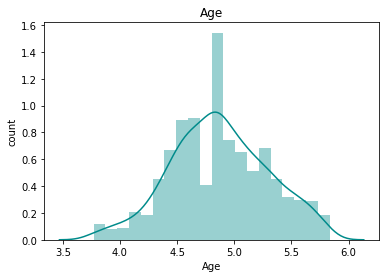

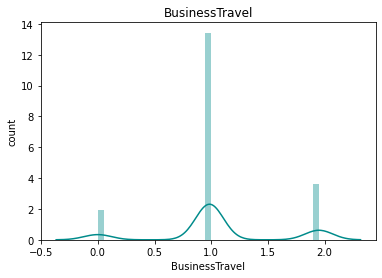

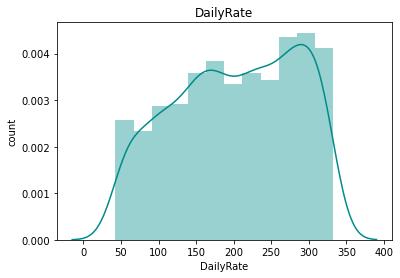

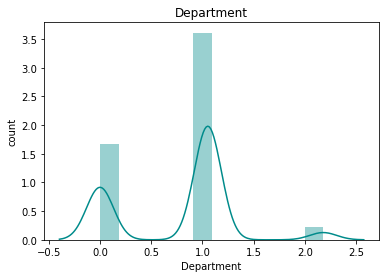

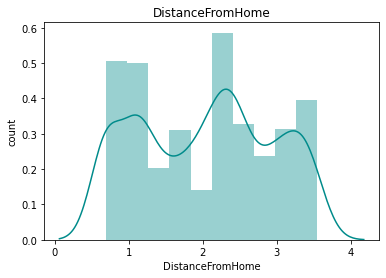

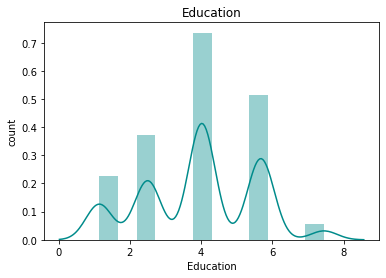

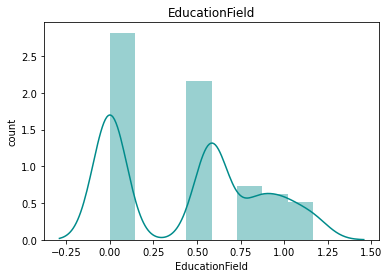

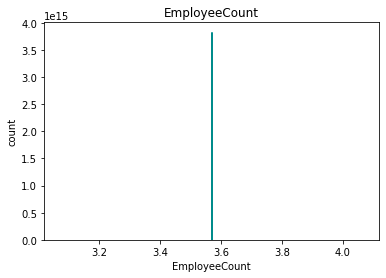

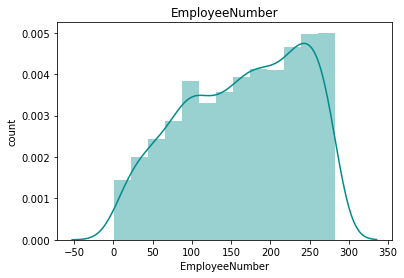

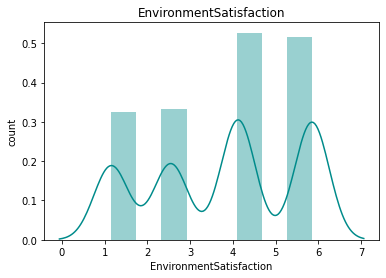

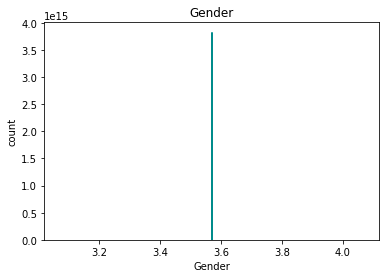

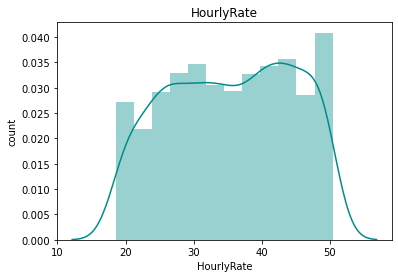

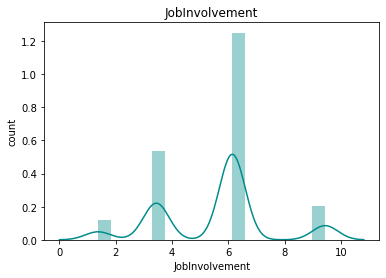

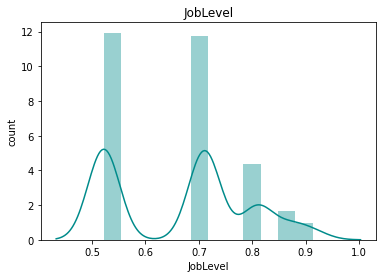

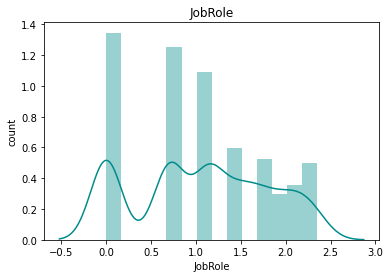

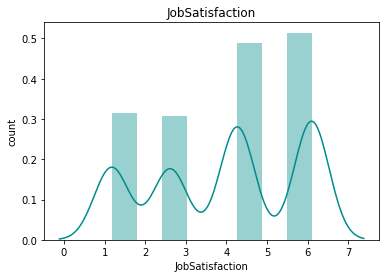

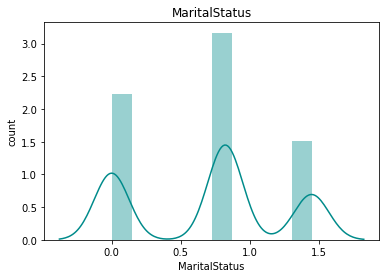

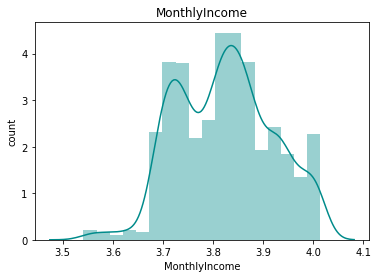

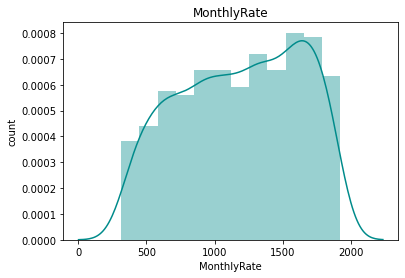

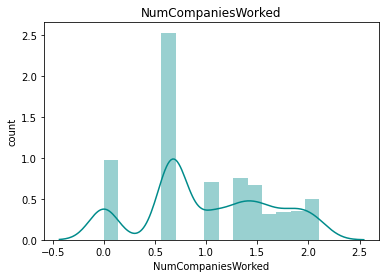

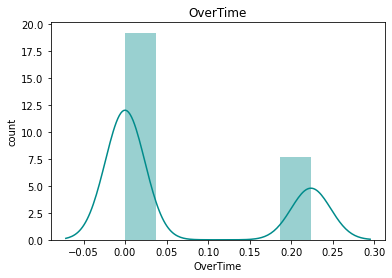

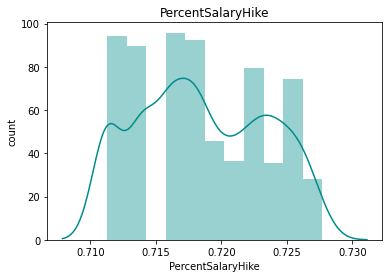

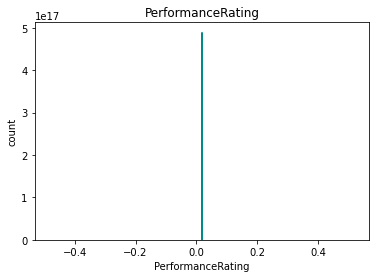

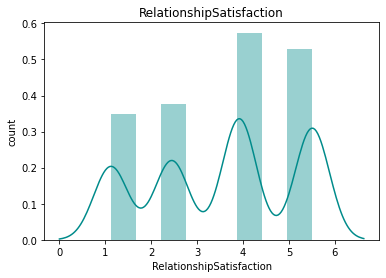

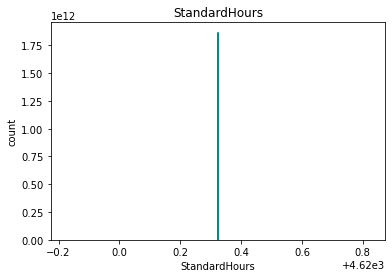

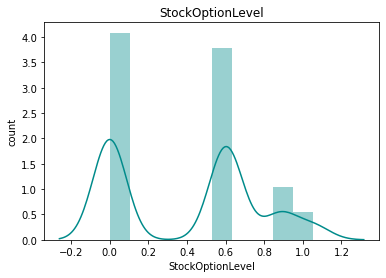

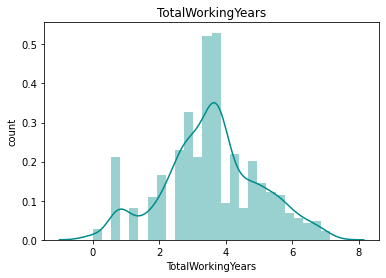

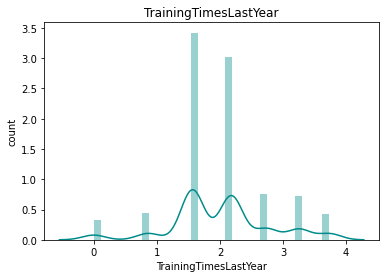

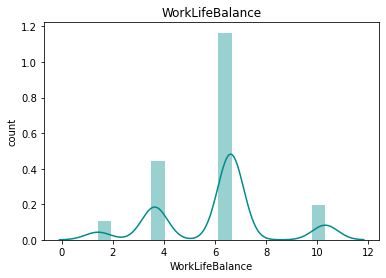

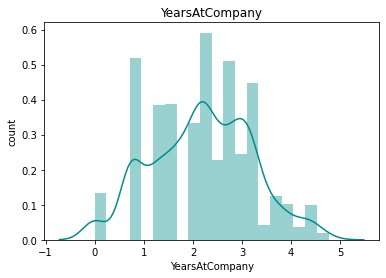

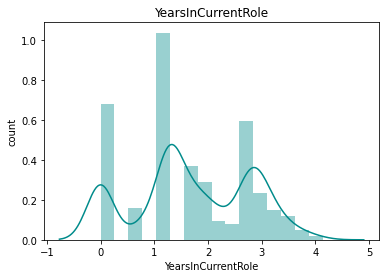

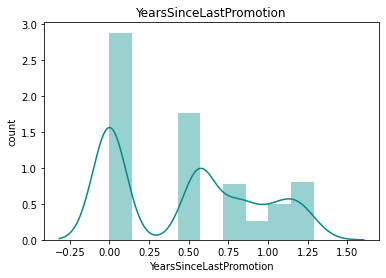

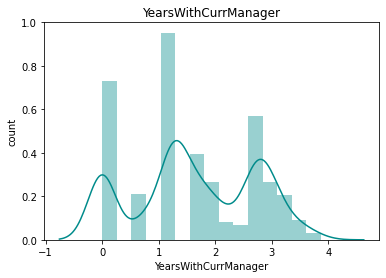

In [58]:
for feature in x_trans :
    sns.distplot(x_trans[feature] , kde = True , color = 'darkcyan' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

In [59]:
for i in x_trans :
    print(i , max(x_trans[i]) - min(x_trans[i]))

Age 2.06432084330444
BusinessTravel 1.9487077482503832
DailyRate 289.7717140380228
Department 2.1783975569972376
DistanceFromHome 2.8412634893142945
Education 6.305327737725629
EducationField 1.1666328236233081
EmployeeCount 0.0
EmployeeNumber 280.93700781292216
EnvironmentSatisfaction 4.698475259709712
Gender 0.0
HourlyRate 31.753595818091632
JobInvolvement 8.054761601874503
JobLevel 0.39133586202205217
JobRole 2.347946366275246
JobSatisfaction 4.924580158181589
MaritalStatus 1.4486575677747677
MonthlyIncome 0.4725735714819259
MonthlyRate 1608.9507007973987
NumCompaniesWorked 2.1062092687091054
OverTime 0.22382425398956415
PercentSalaryHike 0.01640055838913046
PerformanceRating 0.0
RelationshipSatisfaction 4.3803256531154435
StandardHours 0.0
StockOptionLevel 1.055181268554015
TotalWorkingYears 7.14935234047286
TrainingTimesLastYear 3.735420973295898
WorkLifeBalance 8.890975796861273
YearsAtCompany 4.7586827663400815
YearsInCurrentRole 4.135999609989921
YearsSinceLastPromotion 1.28854

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_s = scaler.fit_transform(x_trans)
x_s

array([[ 0.61013332, -0.15657182,  0.75061538, ...,  0.29052433,
        -1.07353381,  0.58217664],
       [ 1.37182973,  1.70024073, -1.34337244, ...,  1.0065754 ,
         0.19316755,  1.01807316],
       [ 0.18248603, -0.15657182,  1.33708042, ..., -1.57181404,
        -1.07353381, -1.52842596],
       ...,
       [-1.0804891 , -0.15657182, -1.75453754, ..., -0.39076907,
        -1.07353381,  0.01867962],
       [ 1.37182973,  1.70024073,  0.57328582, ...,  0.79376377,
        -1.07353381,  1.20578193],
       [-0.16377603, -0.15657182, -0.37222758, ..., -0.01873824,
         0.19316755, -0.3478709 ]])

In [61]:
x_sc = pd.DataFrame(x_s , columns = x_trans.columns)
x_sc

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.610133,-0.156572,0.750615,-1.391894,-1.489968,-0.902402,-1.097730,0.0,-2.167233,-0.712215,...,-1.524369,0.0,-1.084263,-0.173231,-2.608524,-2.147950,0.231837,0.290524,-1.073534,0.582177
1,1.371830,1.700241,-1.343372,0.484091,0.244561,-1.759177,-1.097730,0.0,-2.157256,0.204826,...,1.235448,0.0,0.548653,0.147620,0.217074,0.274860,0.948319,1.006575,0.193168,1.018073
2,0.182486,-0.156572,1.337080,0.484091,-1.028366,-0.902402,1.748036,0.0,-2.139969,1.210036,...,-0.690386,0.0,-1.084263,-0.351153,0.217074,0.274860,-2.156089,-1.571814,-1.073534,-1.528426
3,-0.284736,1.700241,1.377080,0.484091,-0.698191,1.102042,-1.097730,0.0,-2.132165,1.210036,...,0.235192,0.0,-1.084263,-0.173231,0.217074,0.274860,0.621429,1.006575,1.027520,-1.528426
4,-1.080489,-0.156572,-0.467301,0.484091,-1.028366,-1.759177,0.322416,0.0,-2.117665,-1.522916,...,1.235448,0.0,0.548653,-0.544046,0.217074,0.274860,-0.933983,-0.390769,0.722874,-0.347871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,0.069696,1.700241,0.252885,0.484091,1.408969,-0.902402,0.322416,0.0,1.533695,0.204826,...,0.235192,0.0,0.548653,1.039364,0.217074,0.274860,0.003289,-0.390769,-1.073534,0.018680
1383,0.400794,-0.156572,-0.410602,0.484091,-0.049519,-1.759177,0.322416,0.0,1.534945,1.210036,...,-1.524369,0.0,0.548653,-0.007630,1.606919,0.274860,0.436162,1.006575,0.193168,1.018073
1384,-1.080489,-0.156572,-1.754538,0.484091,-0.440553,0.057451,-1.097730,0.0,1.537447,-0.712215,...,-0.690386,0.0,0.548653,-0.544046,-2.608524,0.274860,0.231837,-0.390769,-1.073534,0.018680
1385,1.371830,1.700241,0.573286,-1.391894,-1.028366,0.057451,0.322416,0.0,1.538697,1.210036,...,1.235448,0.0,-1.084263,1.039364,0.217074,-1.112829,0.791264,0.793764,-1.073534,1.205782


In [62]:
x_sc = x_sc.drop('EmployeeNumber' , axis = 1)

In [63]:
x_sc.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.610133,-0.156572,0.750615,-1.391894,-1.489968,-0.902402,-1.097730,0.0,-0.712215,0.0,...,-1.524369,0.0,-1.084263,-0.173231,-2.608524,-2.14795,0.231837,0.290524,-1.073534,0.582177
1,1.371830,1.700241,-1.343372,0.484091,0.244561,-1.759177,-1.097730,0.0,0.204826,0.0,...,1.235448,0.0,0.548653,0.147620,0.217074,0.27486,0.948319,1.006575,0.193168,1.018073
2,0.182486,-0.156572,1.337080,0.484091,-1.028366,-0.902402,1.748036,0.0,1.210036,0.0,...,-0.690386,0.0,-1.084263,-0.351153,0.217074,0.27486,-2.156089,-1.571814,-1.073534,-1.528426
3,-0.284736,1.700241,1.377080,0.484091,-0.698191,1.102042,-1.097730,0.0,1.210036,0.0,...,0.235192,0.0,-1.084263,-0.173231,0.217074,0.27486,0.621429,1.006575,1.027520,-1.528426
4,-1.080489,-0.156572,-0.467301,0.484091,-1.028366,-1.759177,0.322416,0.0,-1.522916,0.0,...,1.235448,0.0,0.548653,-0.544046,0.217074,0.27486,-0.933983,-0.390769,0.722874,-0.347871


<AxesSubplot:>

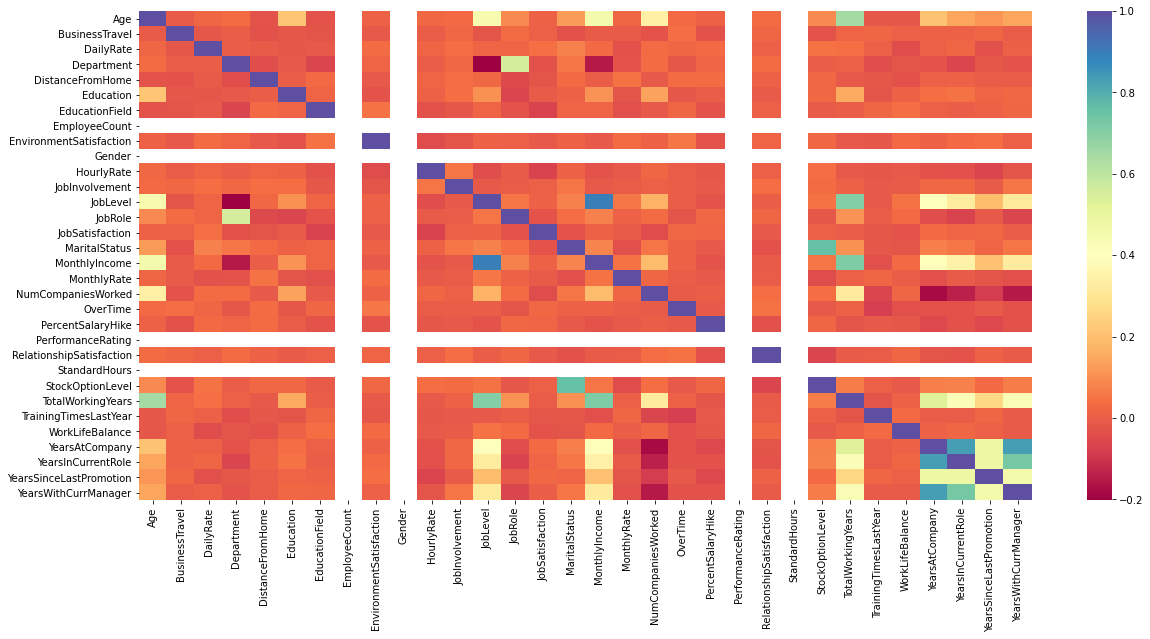

In [64]:
plt.figure(figsize= (20,9))
sns.heatmap(x_sc.corr() , cmap = 'Spectral')

# Principal Component Analysis (PCA)

In [65]:
pca = PCA(n_components = 'mle' , svd_solver = 'full' )
xpca = pca.fit_transform(x_sc)

In [66]:
xpca

array([[-0.40323445,  0.38487432, -1.82165956, ..., -0.85457223,
         0.167705  ,  0.08142928],
       [-1.52143945, -0.76793273,  0.21208338, ..., -0.67056078,
         0.04455712,  0.13879567],
       [ 3.4858675 ,  1.53140589, -1.11855383, ...,  0.15773715,
        -0.4084062 ,  0.32402565],
       ...,
       [ 0.55853911,  0.17750457,  0.86424596, ..., -0.06566456,
         0.38329456, -0.03402932],
       [-1.72523547, -0.18721991, -1.10264087, ..., -0.11124436,
        -0.25813556,  0.07751932],
       [ 0.36291929, -0.08018393, -0.2892299 , ..., -0.55874517,
         0.05137627,  0.35119116]])

In [67]:
x_f = pd.DataFrame(xpca )
x_f

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.403234,0.384874,-1.821660,-1.593129,3.338198,0.741962,0.661272,0.545706,-0.240532,1.602051,...,-0.162958,-1.402386,1.069248,-0.539489,0.473106,-0.085404,-0.234335,-0.854572,0.167705,0.081429
1,-1.521439,-0.767933,0.212083,0.662460,-0.644577,0.056774,0.666011,-0.752713,-1.906228,0.803935,...,-0.751966,-0.361071,1.030646,1.219447,-0.410221,0.119237,-0.277551,-0.670561,0.044557,0.138796
2,3.485868,1.531406,-1.118554,0.344522,-0.264117,1.300886,-0.298727,1.117275,2.145028,-1.245174,...,-0.073867,-1.473595,0.288364,0.207432,-0.061791,-0.031666,-0.168701,0.157737,-0.408406,0.324026
3,0.510952,-1.022647,-0.302127,0.590874,0.698507,1.927502,-0.526622,1.749786,-1.177551,0.164867,...,0.785239,0.094617,-0.582612,0.327342,-0.350604,1.691029,0.832012,0.666241,0.542826,-0.214474
4,1.541121,0.063777,0.486182,0.652509,-1.179220,-0.261058,-0.386206,0.773674,-0.749394,0.040150,...,0.306933,-2.265075,-0.418501,-0.964262,-0.128631,0.005969,-0.341101,0.024691,-0.306303,-0.368031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,0.145555,0.727321,0.672667,0.315148,0.685563,0.500980,0.190228,0.205700,-0.920420,-1.247376,...,-0.366906,-0.821724,1.310376,-0.044273,-0.139295,-0.371070,-0.136989,0.833983,0.099991,0.915186
1383,-1.826438,0.063339,0.300799,0.767423,-2.983575,0.059198,1.439406,-1.256493,-0.558276,-0.341485,...,0.879247,-0.742218,0.525117,-0.492896,0.051708,0.028217,-0.373158,-1.119758,-0.189310,0.029903
1384,0.558539,0.177505,0.864246,0.478931,1.895690,-0.282695,-0.934369,-0.677761,0.464191,2.047005,...,1.145262,1.222098,0.042441,-0.940061,-0.173630,-0.124929,-0.195396,-0.065665,0.383295,-0.034029
1385,-1.725235,-0.187220,-1.102641,-1.199540,-0.104889,0.601799,-0.428903,1.352322,-0.092143,-0.565655,...,-1.032677,0.669293,1.858958,0.827264,0.309514,-0.151838,0.953037,-0.111244,-0.258136,0.077519


In [68]:
print(pca.components_)

[[-2.60984775e-01  8.41017383e-05 -1.60272673e-02  4.69403096e-02
  -2.16615775e-03 -7.74539114e-02 -7.71598271e-03  6.77626358e-21
  -8.39722294e-03  5.29395592e-23  1.98701934e-02 -1.51245577e-02
  -3.69269811e-01 -8.27960327e-03 -1.05645341e-02 -8.10093936e-02
  -3.74022076e-01 -2.99559000e-03 -5.36125421e-02  5.60268975e-03
   2.45123407e-02  0.00000000e+00  5.33649195e-03 -2.86985925e-41
  -7.34610859e-02 -4.02119441e-01  9.28208821e-03 -1.31177332e-02
  -3.94771297e-01 -3.57599385e-01 -2.47210283e-01 -3.52051740e-01]
 [ 3.66968389e-01 -2.81650196e-02  5.24777582e-02  8.79955591e-02
  -1.13656963e-02  1.56059428e-01 -2.36210836e-02 -1.73472348e-18
  -1.05342681e-02 -2.16840434e-19  5.04257430e-02  7.19847201e-03
   2.30340132e-01  1.84719912e-01 -3.87412310e-02  1.50557683e-01
   2.38008335e-01  4.93094752e-02  4.48064221e-01  3.54095467e-02
   3.70986800e-02  1.26217745e-29  3.48335509e-02  4.93038066e-32
   1.12912550e-01  2.39512567e-01 -5.11779004e-02  7.23013292e-03
  -3.0683

In [69]:
x_f.shape

(1387, 28)

In [70]:
y = adf_wo.iloc[: ,1:2 ]
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


# Machine Learning Models

In [71]:
#Finding best Random State
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_f,y,test_size=.30,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(X_train,y_train)
    predrf=rf.predict(X_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)

Best accuracy is  0.894484412470024 on random state  106


In [72]:
models = [LogisticRegression(),
             KNeighborsClassifier(),
             SVC(),
             RandomForestClassifier(),
             AdaBoostClassifier(),
             DecisionTreeClassifier(),
             GaussianNB()
         ]

names = ['LogisticRegression','K Nearest Neighbor','Support Vector Classifier','Random Forest','AdaBoost Classifier',
         'Decision Tree Classifier' , 'GaussianNB' ]

for model,name in zip(models,names):
    fit = model.fit(X_train , y_train)
    y_predicted = model.predict(X_test)
    score = model.score(X_train , y_train)
    print(name ," - " ,score)
    print("Accuracy:",accuracy_score(y_predicted, y_test))
    print("Confusion Matrix:\n",confusion_matrix(y_predicted, y_test))
    print("\t\tclassification report")
    print("-" * 52)
    print(classification_report(y_predicted , y_test))

LogisticRegression  -  0.8917525773195877
Accuracy: 0.8729016786570744
Confusion Matrix:
 [[339  43]
 [ 10  25]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       382
           1       0.37      0.71      0.49        35

    accuracy                           0.87       417
   macro avg       0.67      0.80      0.71       417
weighted avg       0.92      0.87      0.89       417

K Nearest Neighbor  -  0.8793814432989691
Accuracy: 0.8345323741007195
Confusion Matrix:
 [[342  62]
 [  7   6]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       404
           1       0.09      0.46      0.15        13

    accuracy                           0.83       417
   macro avg       0.53      0.65      0.53       417
weighted avg       0.

# Support Vector Classifiers

In [73]:
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_f,y,test_size=.30,random_state=i)
    sv = SVC()
    sv.fit(X_train,y_train)
    predsv = sv.predict(X_test)
    acc=accuracy_score(y_test,predsv)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)

Best accuracy is  0.9040767386091128 on random state  99


In [74]:
X_train,X_test,y_train,y_test=train_test_split(x_f,y,test_size=.30,random_state=99)
sv = SVC()
sv.fit(X_train , y_train)
sv_predicted = sv.predict(X_test)
score = sv.score(X_train , y_train)

print(SVC() ," - " ,score)
print("Accuracy:",accuracy_score(sv_predicted, y_test))
print("Confusion Matrix:\n",confusion_matrix(sv_predicted, y_test))
print("\t\tclassification report")
print("-" * 52)
print(classification_report(sv_predicted , y_test))

SVC()  -  0.9237113402061856
Accuracy: 0.9040767386091128
Confusion Matrix:
 [[354  32]
 [  8  23]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       386
           1       0.42      0.74      0.53        31

    accuracy                           0.90       417
   macro avg       0.70      0.83      0.74       417
weighted avg       0.94      0.90      0.92       417



# Random Forest Classifier

In [75]:
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_f,y,test_size=.30,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train,y_train)
    predrf = rf.predict(X_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)

Best accuracy is  0.8848920863309353 on random state  30


In [76]:
X_train,X_test,y_train,y_test=train_test_split(x_f,y,test_size=.30,random_state=106)
rf = RandomForestClassifier()
rf.fit(X_train , y_train)
rf_predicted = rf.predict(X_test)
score = rf.score(X_train , y_train)

print(RandomForestClassifier() ," - " ,score)
print("Accuracy:",accuracy_score(rf_predicted, y_test))
print("Confusion Matrix:\n",confusion_matrix(rf_predicted, y_test))
print("\t\tclassification report")
print("-" * 52)
print(classification_report(rf_predicted , y_test))

RandomForestClassifier()  -  1.0
Accuracy: 0.8896882494004796
Confusion Matrix:
 [[363  45]
 [  1   8]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       408
           1       0.15      0.89      0.26         9

    accuracy                           0.89       417
   macro avg       0.57      0.89      0.60       417
weighted avg       0.98      0.89      0.93       417



# Decision Tree Classifier

In [77]:
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_f,y,test_size=.30,random_state=i)
    dtr = DecisionTreeClassifier()
    dtr.fit(X_train,y_train)
    preddtr = dtr.predict(X_test)
    acc=accuracy_score(y_test,preddtr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)

Best accuracy is  0.829736211031175 on random state  106


In [78]:
X_train,X_test,y_train,y_test=train_test_split(x_f,y,test_size=.30,random_state=106)
dtr = DecisionTreeClassifier()
dtr.fit(X_train , y_train)
dtr_predicted = dtr.predict(X_test)
score = dtr.score(X_train , y_train)

print(DecisionTreeClassifier() ," - " ,score)
print("Accuracy:",accuracy_score(dtr_predicted, y_test))
print("Confusion Matrix:\n",confusion_matrix(dtr_predicted, y_test))
print("\t\tclassification report")
print("-" * 52)
print(classification_report(dtr_predicted , y_test))

DecisionTreeClassifier()  -  1.0
Accuracy: 0.8177458033573142
Confusion Matrix:
 [[318  30]
 [ 46  23]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       348
           1       0.43      0.33      0.38        69

    accuracy                           0.82       417
   macro avg       0.65      0.62      0.64       417
weighted avg       0.80      0.82      0.81       417



# AdaBoost Classifier

In [79]:
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,y_train,y_test=train_test_split(x_f,y,test_size=.30,random_state=i)
    ab = AdaBoostClassifier()
    ab.fit(X_train,y_train)
    predab = ab.predict(X_test)
    acc=accuracy_score(y_test,predab)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)

Best accuracy is  0.8968824940047961 on random state  166


In [80]:
X_train,X_test,y_train,y_test=train_test_split(x_f,y,test_size=.30,random_state=166)
ab = AdaBoostClassifier()
ab.fit(X_train , y_train)
ab_predicted = ab.predict(X_test)
score = ab.score(X_train , y_train)

print(AdaBoostClassifier() ," - " ,score)
print("Accuracy:",accuracy_score(ab_predicted, y_test))
print("Confusion Matrix:\n",confusion_matrix(ab_predicted, y_test))
print("\t\tclassification report")
print("-" * 52)
print(classification_report(ab_predicted , y_test))

AdaBoostClassifier()  -  0.8969072164948454
Accuracy: 0.8968824940047961
Confusion Matrix:
 [[345  30]
 [ 13  29]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       375
           1       0.49      0.69      0.57        42

    accuracy                           0.90       417
   macro avg       0.73      0.81      0.76       417
weighted avg       0.92      0.90      0.90       417



# AdaBoost Classifier Hyperparameter tuning

In [81]:
param_grid = {
    'learning_rate':[0.001, 0.10, 0.1, 1],

             'n_estimators':range(50, 400, 50)
             }


ab = AdaBoostClassifier( random_state = 166)


grid_ab = GridSearchCV(ab , param_grid, scoring = 'accuracy')
grid_ab.fit(X_train, y_train)

print("Best Hyper Parameters:\n",grid_ab.best_params_)
print("training accuracy:\n",grid_ab.best_score_)
ab_grid_pred = grid_ab.best_estimator_.predict(X_test)

print("Accuracy:",accuracy_score(ab_grid_pred , y_test))

print("Confusion Matrix:\n",confusion_matrix(ab_grid_pred , y_test))
print("\t\tclassification report")
print("-" * 52)
print(classification_report(ab_grid_pred , y_test))

Best Hyper Parameters:
 {'learning_rate': 0.1, 'n_estimators': 350}
training accuracy:
 0.8463917525773196
Accuracy: 0.9064748201438849
Confusion Matrix:
 [[353  34]
 [  5  25]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       387
           1       0.42      0.83      0.56        30

    accuracy                           0.91       417
   macro avg       0.70      0.87      0.75       417
weighted avg       0.95      0.91      0.92       417



# Training Random Forest Classifier again

In [82]:
X_train,X_test,y_train,y_test=train_test_split(x_f,y,test_size=.30,random_state=106)

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


# Random Forest Hyperparameter Tuning

In [89]:
param_grid = { "criterion" : ["gini", "entropy"], 
              "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
              "n_estimators": [100, 400, 700, 1000, 1500]}

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)
clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [90]:
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[791,   3],
       [161,  15]], dtype=int64)

In [91]:
print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.8333333333333334
Recall: 0.08522727272727272


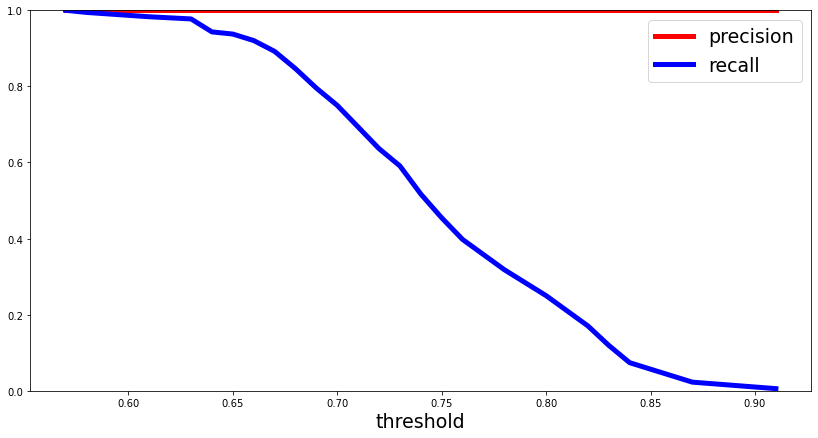

In [92]:
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

# ROC_AUC Curve

This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

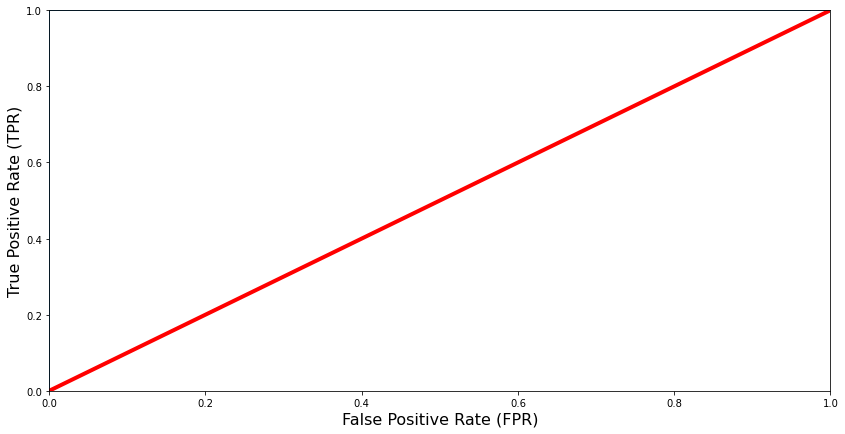

In [93]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

# plotting them against each other

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

# Model saving

In [94]:
import joblib
joblib.dump(rf,'RandomForestClassifier.pkl')

['RandomForestClassifier.pkl']